# Movie_recommendation_from_top1000imdb
Implement from kaggle dataset :
https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import difflib
import imageio
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Preprocessing Data

In [ ]:
data = pd.read_csv('/content/imdb_top_1000.csv')
data.head(6)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
data.shape

(1000, 16)

In [ ]:
feature_selection = ['Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Overview'] # selecting the relevant features for recommendation

In [ ]:
data_selected = data[feature_selection]  #  Check feature selecting isn't null
data_selected.isna().sum()

Genre       0
Director    0
Star1       0
Star2       0
Star3       0
Star4       0
Overview    0
dtype: int64

In [ ]:
# Clean Genre feature

data_selected['Genre'] = data_selected['Genre'].apply(lambda x: x.replace(',',''))

# Combine all features as combine_feature for applied TfidfVectorizer

combine_feature = data_selected['Genre']+' '+data_selected['Director']+' '+data_selected['Star1']+' '+data_selected['Star2']+ ' '+data_selected['Star3']+' '+data_selected['Star4']+' '+data_selected['Overview']

combine_feature

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      Drama Frank Darabont Tim Robbins Morgan Freema...
1      Crime Drama Francis Ford Coppola Marlon Brando...
2      Action Crime Drama Christopher Nolan Christian...
3      Crime Drama Francis Ford Coppola Al Pacino Rob...
4      Crime Drama Sidney Lumet Henry Fonda Lee J. Co...
                             ...                        
995    Comedy Drama Romance Blake Edwards Audrey Hepb...
996    Drama Western George Stevens Elizabeth Taylor ...
997    Drama Romance War Fred Zinnemann Burt Lancaste...
998    Drama War Alfred Hitchcock Tallulah Bankhead J...
999    Crime Mystery Thriller Alfred Hitchcock Robert...
Length: 1000, dtype: object

In [ ]:
list_all_titles = data['Series_Title'].tolist()  #  Create list of movie title
list_all_titles[:6]  # First 6 element of list

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather: Part II',
 '12 Angry Men',
 'The Lord of the Rings: The Return of the King']

In [ ]:
# fit & transform combine_feature with TfidfVectorizer

vectorizer = TfidfVectorizer()
feature_transform = vectorizer.fit_transform(combine_feature)

In [ ]:
print(feature_transform[:10])  # First 10 vector

  (0, 2111)	0.2442849198387952
  (0, 1723)	0.22081837164834447
  (0, 170)	0.23055786912601564
  (0, 8658)	0.15744837286717936
  (0, 7049)	0.19336427022278532
  (0, 2796)	0.2442849198387952
  (0, 412)	0.05468730080510984
  (0, 8030)	0.23055786912601564
  (0, 3049)	0.2070913209355649
  (0, 9490)	0.14372132215439976
  (0, 6166)	0.1070374163356869
  (0, 6116)	0.23055786912601564
  (0, 6295)	0.16159908339494447
  (0, 1078)	0.1809149210576301
  (0, 5578)	0.15744837286717936
  (0, 4157)	0.19336427022278532
  (0, 8891)	0.1121833514324642
  (0, 7482)	0.2442849198387952
  (0, 9347)	0.15493944208218063
  (0, 3617)	0.2442849198387952
  (0, 1057)	0.1760702315925799
  (0, 3212)	0.18362477274511418
  (0, 5790)	0.18979728230535944
  (0, 7310)	0.21326383049581019
  (0, 8676)	0.1680672723254805
  :	:
  (9, 1651)	0.2007761871031371
  (9, 8939)	0.2007761871031371
  (9, 3142)	0.17185944154467517
  (9, 8016)	0.21273008359225196
  (9, 1367)	0.1624708089293433
  (9, 5471)	0.16838696959023383
  (9, 2239)	0.212

In [ ]:
feature_transform.shape  # Shape of all vector

(1000, 9614)

In [ ]:
similarity = cosine_similarity(feature_transform)  # Find similarity score by cosine_similarity then mapping to each other

print(similarity)   

[[1.         0.00802749 0.02138193 ... 0.0044524  0.03769353 0.00477546]
 [0.00802749 1.         0.03263371 ... 0.01846931 0.00959921 0.01895678]
 [0.02138193 0.03263371 1.         ... 0.01963152 0.05316933 0.06326703]
 ...
 [0.0044524  0.01846931 0.01963152 ... 1.         0.04476421 0.0315143 ]
 [0.03769353 0.00959921 0.05316933 ... 0.04476421 1.         0.06160547]
 [0.00477546 0.01895678 0.06326703 ... 0.0315143  0.06160547 1.        ]]


In [ ]:
print(similarity.shape)  #  Shape of all vector

(1000, 1000)


Define function for recommend movie

In [ ]:
def movie_recommend(movie_name):
  movie_name = str(input('Enter movie name :\n'))                              # User input movie name
  find_close_match = difflib.get_close_matches(movie_name, list_all_titles)    # Find closest match from user input
  close_match = find_close_match[0]
  index_of_the_movie = data[data.Series_Title == close_match].index[0]         # Get index of movie name
  similarity_score = list(enumerate(similarity[index_of_the_movie]))           # select the similarity score relevent with index movie
  sorted_similar_movies_top5 = sorted(similarity_score, key = lambda x:x[1], reverse = True)[:6] # select the top 5 similarity score including itself movie
  title_list = []
  poster_list = []
  for i in sorted_similar_movies_top5:                                         # Extract information from index of similarity selected
    index = i[0]
    title = data[data.index==index]['Series_Title'].values[0]
    picture = data[data.index==index]['Poster_Link'].values[0]
    picture = imageio.imread(picture)
    title_list.append(title)
    poster_list.append(picture)
  
  fig, axes = plt.subplots(1,6, figsize = (28,8))                             # Plot Title & poster from Extracing information
  axes = axes.flatten()
  for i in range(6):
    if i == 0:
      axes[i].imshow(poster_list[i])
      axes[i].title.set_text('Selected : {}'.format(title_list[i]))
    else:
      axes[i].imshow(poster_list[i])
      axes[i].title.set_text(title_list[i])
  fig.suptitle('Recommended Movie',fontsize=16)
  plt.show()

In [ ]:
def get_recommend():      # Define try,except function that contain movie_recommend function in case of error in user input
  try:
    movie_recommend('Press for enter movie you like')
  except:
    random_name_list = np.random.choice(list_all_titles,5).tolist()
    print('\n')
    print('*'*20)
    print('Error is happen. Due to too much wrong spelling or out of list from IMDB1000. Try another Movie name.. \nMay be pick one from random list below  \n\n{}\n'.format(random_name_list))
    print('or from top 10 IMDBscore list below  \n\n{}\n'.format(list_all_titles[:10]))
    movie_recommend('Press for enter movie you like')

Enter movie name :
seven


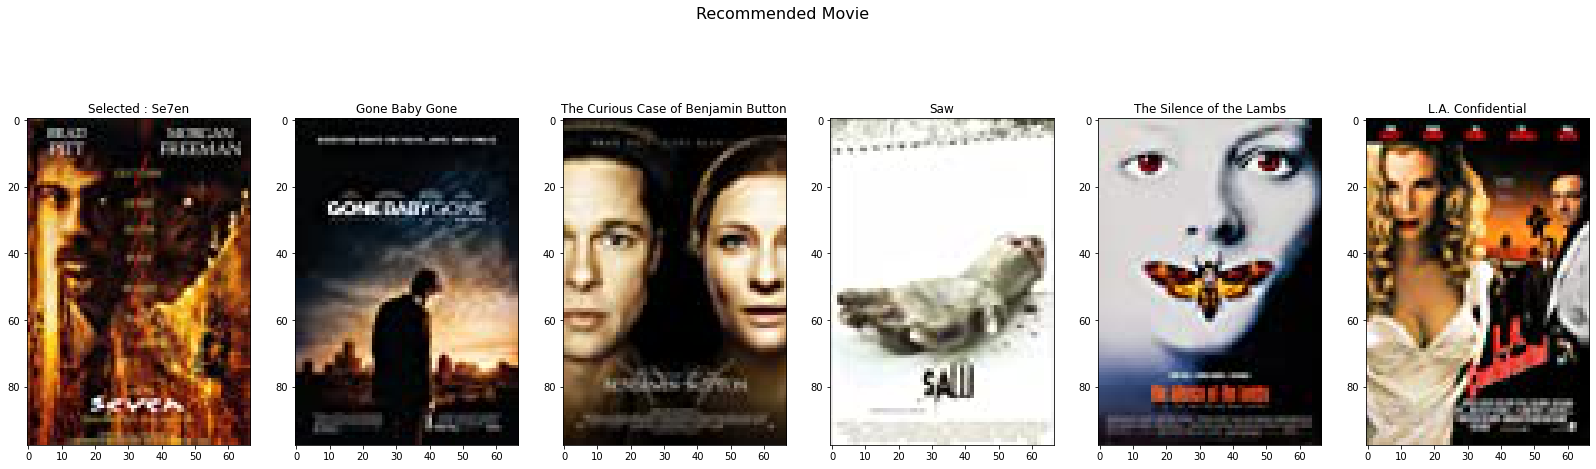

In [ ]:
get_recommend()

Enter movie name :
bat man


********************
Error is happen. Due to too much wrong spelling or out of list from IMDB1000. Try another Movie name.. 
May be pick one from random list below vvv 

['Double Indemnity', 'Million Dollar Baby', 'Manbiki kazoku', 'The 39 Steps', 'Coco']

or from top 10 IMDBscore list below vvv 

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather: Part II', '12 Angry Men', 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', "Schindler's List", 'Inception', 'Fight Club']

Enter movie name :
the dark knight


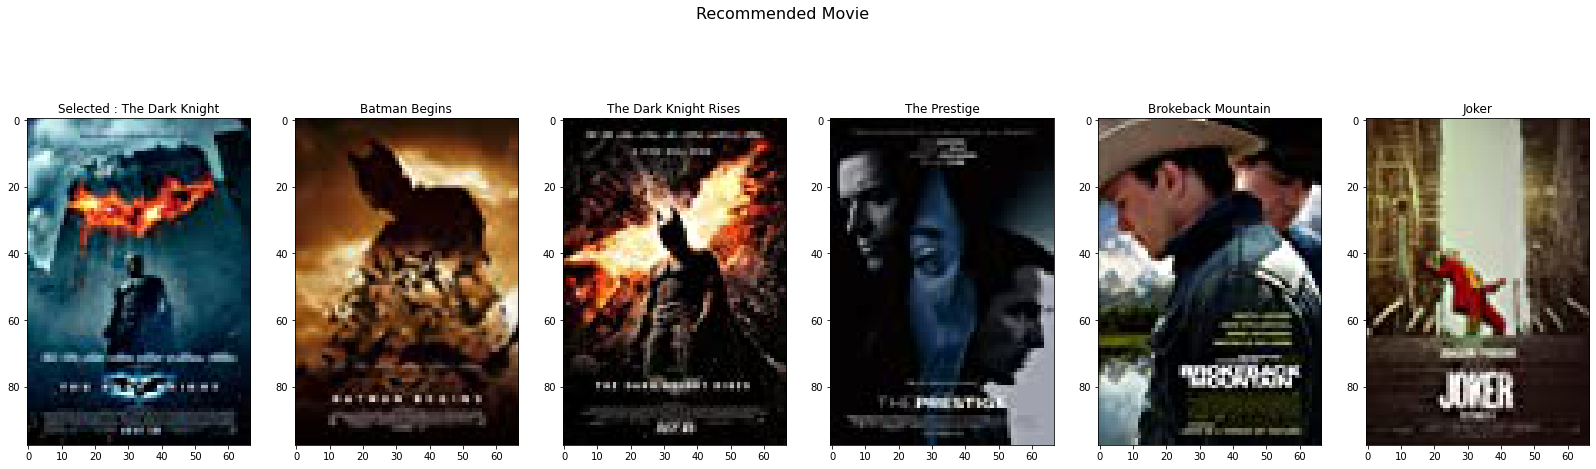

In [ ]:
get_recommend()

In [1]:
!pip install streamlit -q
!pip install pyngrok -q

     |████████████████████████████████| 10.1 MB 17.6 MB/s 
     |████████████████████████████████| 4.3 MB 41.9 MB/s 
     |████████████████████████████████| 181 kB 37.2 MB/s 
     |████████████████████████████████| 76 kB 2.8 MB/s 
     |████████████████████████████████| 164 kB 40.0 MB/s 
     |████████████████████████████████| 111 kB 37.6 MB/s 
     |████████████████████████████████| 63 kB 696 kB/s 
     |████████████████████████████████| 130 kB 51.0 MB/s 
     |████████████████████████████████| 793 kB 52.1 MB/s 
     |████████████████████████████████| 380 kB 41.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.2 which is incompatible.
google-colab 1.0.0 requires ipyt

Write app.py for deployment

In [18]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('imdb_top_1000.csv')
feature_selection = ['Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Overview']
data_selected = data[feature_selection]
data_selected['Genre'] = data_selected['Genre'].apply(lambda x: x.replace(',',''))
combine_feature = data_selected['Genre']+' '+data_selected['Director']+' '+data_selected['Star1']+' '+data_selected['Star2']+ ' '+data_selected['Star3']+' '+data_selected['Star4']+' '+data_selected['Overview']
list_all_titles = data['Series_Title'].tolist()
vectorizer = TfidfVectorizer()
feature_transform = vectorizer.fit_transform(combine_feature)
similarity = cosine_similarity(feature_transform)



def movie_recommend(movie_name = 'seven'):
  find_close_match = difflib.get_close_matches(movie_name, list_all_titles)    
  close_match = find_close_match[0]
  index_of_the_movie = data[data.Series_Title == close_match].index[0]         
  similarity_score = list(enumerate(similarity[index_of_the_movie]))           
  sorted_similar_movies_top5 = sorted(similarity_score, key = lambda x:x[1], reverse = True)[:6] 
  title_list = []
  poster_list = []
  for i in sorted_similar_movies_top5:                                        
    index = i[0]
    title = data[data.index==index]['Series_Title'].values[0]
    picture = data[data.index==index]['Poster_Link'].values[0]
    title_list.append(title)
    poster_list.append(picture)

  return title_list, poster_list

def get_recommend(movie_name):      # Define try,except function that contain movie_recommend function in case of error in user input
  try:
    title_list, poster_list = movie_recommend(movie_name = movie_name)
  except:
    random_name_list = np.random.choice(list_all_titles,5).tolist()
    print('\n')
    print('*'*20)
    print('Error is happen. Due to too much wrong spelling or out of list from IMDB1000. Try another Movie name.. \nMay be pick one from random list below vvv \n\n{}\n'.format(random_name_list))
    print('or from top 10 IMDBscore list below vvv \n\n{}\n'.format(list_all_titles[:10]))
    movie_recommend('Press for enter movie you like')
  finally:
    return title_list, poster_list


def run():

  st.title('**_Movie Recommendation Web Application_**')

  title = st.text_input('Write your intresed movie')

  if st.button('Show Recommendation'):
    try:
      title_list, poster_list = movie_recommend(movie_name = title)
    except:
      random_name_list = np.random.choice(list_all_titles,5).tolist()
      st.write('\n')
      st.write('*'*20)
      st.write('Error is happen. Due to too much wrong spelling or The movie is not ranked IMDB1000. Try another Movie name.. \nMay be pick one from random list below  \n\n{}\n'.format(random_name_list))
      st.write('or from top 10 IMDBscore list below  \n\n{}\n'.format(list_all_titles[:10]))

    st.write('Recommended Movie')

    col1, col2, col3, col4, col5, col6 = st.columns(6)

    with col1:
      st.image(poster_list[0],width=100,caption= 'Selected : {}'.format(title_list[0]))
    with col2:
      st.image(poster_list[1],width=100,caption=title_list[1])

    with col3:
      st.image(poster_list[2],width=100,caption=title_list[2])

    with col4:
      st.image(poster_list[3],width=100,caption=title_list[3])

    with col5:
      st.image(poster_list[4],width=100,caption=title_list[4])

    with col6:
      st.image(poster_list[5],width=100,caption=title_list[5])

if __name__ == '__main__':
	run()

Overwriting app.py
